In [46]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [47]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))


    return pop

In [48]:
# np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[1 0 1 1]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 1 0]
 [0 0 1 0]
 [1 1 0 1]
 [1 1 0 1]
 [0 0 1 1]]


In [49]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

In [50]:
onemax(pop[5,:])

3

In [51]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [52]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        # Cài đặt phép lai đồng nhất uniform crossover.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [53]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0

    return pop

In [54]:
def genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)     # Khởi tạo quần thể
    pop_fitness = np.array([objective(ind) for ind in pop])    # Tính fitness của từng cá thể
    i = 0   # Thế hệ thứ 0
    
    num_evaluations = num_individuals  # Số lượng gọi hàm tính độ thích nghi = Số lượng cá thể
    best_fitness = []
    
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)
    
    selection_size = num_individuals // 2     # Xác định size của tập chọn lọc

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])
        
        # Chọn lọc
        selected_indices = truncation_selection( pop, pop_fitness, selection_size )
        selection_set = pop[selected_indices]
        selection_fitness = pop_fitness[selected_indices]

        # Biến đổi
        offspring = crossover(selection_set)
        offspring = mutation(offspring, 0.1)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        
        num_evaluations += len(offspring) # Cập nhật lại
        
        # Quần thể thế hệ tiếp theo
        pop = np.vstack([selection_set, offspring])
        pop_fitness = np.concatenate((selection_fitness, offspring_fitness))
        i += 1
        
        if verbose:
            print(f'#Gen {i}:')
            print(pop_fitness)

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)


In [55]:
np.random.seed(42)
num_parameters = 100
num_individuals = 64
max_evaluations = 100000
pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)

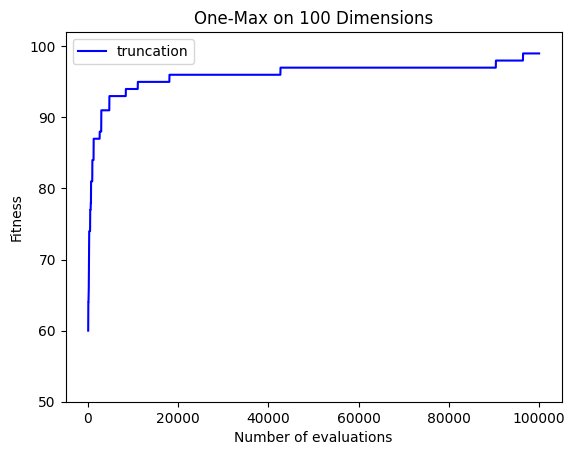

In [56]:
best_fitness = np.array(best_fitness)
plt.plot(best_fitness[:,0], best_fitness[:,1], label='truncation', color='b')
plt.xlabel("Number of evaluations")
plt.ylabel("Fitness")
plt.ylim(num_parameters/2, num_parameters+2)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

In [57]:
n_trials = 10
num_parameters = 100
max_evaluations = 100000
num_individuals = 8 # population size

fits_truncation = []
evals = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals = best_fitness[:,0]
    fits_truncation.append(best_fitness[:,1])

In [58]:
fits_truncation = np.array(fits_truncation)

In [59]:
fits_truncation

array([[ 56,  60,  60, ...,  99,  99,  99],
       [ 62,  62,  63, ..., 100, 100, 100],
       [ 62,  62,  62, ...,  99,  99,  99],
       ...,
       [ 60,  60,  60, ...,  99,  99,  99],
       [ 55,  56,  58, ...,  99,  99,  99],
       [ 61,  62,  62, ...,  99,  99,  99]])

In [60]:
avg = np.mean(fits_truncation, axis=0)
err = np.std(fits_truncation, axis=0)
avg

array([58.9, 59.9, 60.4, ..., 99.1, 99.1, 99.1])

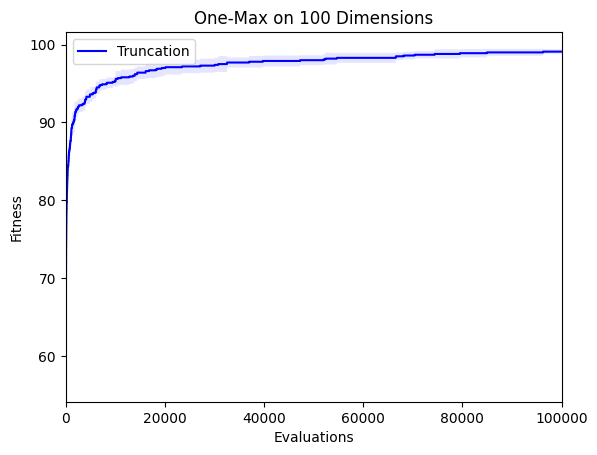

In [61]:
plt.plot(evals, avg, label="Truncation", color='b')
plt.fill_between(evals, avg+err, avg-err, facecolor='b', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

# Bài làm

In [62]:
def POPOP_genetic_algorithm(objective,
                            selection,
                            num_individuals, 
                            num_parameters, 
                            max_evaluations, 
                            early_stop = False,
                            verbose=False):
    
    pop = initialize_population(num_individuals, num_parameters)     # Khởi tạo quần thể
    pop_fitness = np.array([objective(ind) for ind in pop])    # Tính fitness của từng cá thể
    i = 0   # Thế hệ thứ 0
    
    num_evaluations = num_individuals  # Số lượng gọi hàm tính độ thích nghi = Số lượng cá thể
    best_fitness = []
    
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)
    
    selection_size = num_individuals     # Xác định size của tập chọn lọc

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])
        
        # Biến đổi
        offspring = crossover(pop)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        
        # P+O pool
        pool = np.vstack([pop, offspring])
        pool_fitness = np.concatenate((pop_fitness, offspring_fitness))
        
        # Chọn lọc
        selected_indices = selection( pool, pool_fitness, selection_size )
        selection_set = pool[selected_indices]
        selection_fitness = pool_fitness[selected_indices]

        num_evaluations += len(offspring) # Cập nhật lại
        
        # Quần thể thế hệ tiếp theo
        pop = selection_set
        pop_fitness = selection_fitness
        i += 1
        
        if verbose:
            print(f'#Gen {i}:')
            print(pop_fitness)

        # Kiểm tra hội tụ
        if early_stop:
            if np.unique(pop_fitness).shape[0] == 1:
                break
        
    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)

In [63]:
import bisect

def proportional_selection (pop, pop_fitness, selection_size):
    sum_fitness = np.sum(pop_fitness)
    p = pop_fitness / sum_fitness
    p_cumulative = [np.sum(p[:i]) for i in range(1,len(p)+1)]
    indices = []
    
    for i in range(selection_size):
        r = np.random.uniform(0,1)
        index = bisect.bisect_right(p_cumulative, r)  #find the smallest larger than r
        indices.append(index)
        
    return np.array(indices)
        

In [64]:
# def proportional_selection_v2 (pop, pop_fitness, selection_size):
#     sum_fitness = np.sum(pop_fitness)
#     p = pop_fitness / sum_fitness
    
#     indices = np.random.choice(np.arange(0,len(pop)), 
#                                p=p, 
#                                size=selection_size, 
#                                replace = True)
        
#     return np.array(indices)

In [76]:
def tournament_selection (pop, pop_fitness, selection_size, tournament_size = 4, verbose = False):
    count = 0
    pop_fitness_index = np.arange(0,len(pop_fitness))
    indices = []
    while len(indices) != selection_size:
        shuffled_index = np.random.permutation(pop_fitness_index)
        if verbose:
            print("shuffled_index", shuffled_index)
            print("shuffled_fitness",pop_fitness[shuffled_index])
        for i in range(0,len(pop_fitness), tournament_size):
            winner_index = np.argmax(pop_fitness[shuffled_index[i:i+tournament_size]])
            index = shuffled_index[i:i+tournament_size][winner_index]
            indices.append(index)
            
            if verbose:
                print(index)
            
    
    return np.array(indices)

pop_fitness = np.random.randint(0,8,size=8)
print("pop_fitness", pop_fitness)
indices = tournament_selection(None, pop_fitness, 8, verbose = True)
print(indices)

pop_fitness [5 3 3 6 7 2 3 2]
shuffled_index [6 4 7 1 3 2 5 0]
shuffled_fitness [3 7 2 3 6 3 2 5]
4
3
shuffled_index [6 7 3 1 4 5 0 2]
shuffled_fitness [3 2 6 3 7 2 5 3]
3
4
shuffled_index [0 2 4 1 7 6 5 3]
shuffled_fitness [5 3 7 3 2 3 2 6]
4
3
shuffled_index [1 2 5 4 7 0 6 3]
shuffled_fitness [3 3 2 7 2 5 3 6]
4
3
[4 3 3 4 4 3 4 3]


In [77]:
def leadingone (ind):
    try:
        return list(ind).index(0)
    except ValueError:
        return len(ind)

A = np.array([1,1,1,0,1])
B = np.array([0,1,1,1,1])
C = np.array([1,1,0,1,1])
D = np.array([1,1,1,1,1])
E = np.array([0,0,1,1,1])

leadingone(A), leadingone(B), leadingone(C), leadingone(D), leadingone(E)

(3, 0, 2, 5, 0)

In [78]:
def trap_5 (ind):
    u = np.sum(ind)
    if u == 5:
        return 5
    else:
        return 5 - u - 1

A = np.array([1,0,0,0,0])
B = np.array([0,1,1,0,0])
C = np.array([1,0,0,1,1])
D = np.array([1,1,1,1,1])

print (trap_5(A))
print (trap_5(B))
print (trap_5(C))
print (trap_5(D))

3
2
1
5


In [79]:
def concatenate_trap_5 (ind):
    return np.sum([trap_5(ind[i:i+5]) for i in range(0, len(ind), 5)])

A = np.array([1,0,0,0,0])
B = np.array([0,1,1,0,0])
C = np.array([1,0,0,1,1])
D = np.array([1,1,1,1,1])

print(concatenate_trap_5(np.concatenate((A,B)))) 
print(concatenate_trap_5(np.concatenate((C,D))))
print(concatenate_trap_5(np.concatenate((A,D))))
print(concatenate_trap_5(np.concatenate((C,B))))

5
6
8
3


## OneMax

## Tuning poppulation size

In [80]:
np.random.seed(42)
num_parameters = 100
num_individuals = [8,32,64,128,256,512,1024]
max_evaluations = 100000
n_trials = 5

top_best_fitness_onemax = {
    'truncation_selection' : [],
    'proportional_selection' : [],
    'tournament_selection' : []
}

In [81]:
# np.random.seed(42)
# num_parameters = 100
# num_individuals = 64
# max_evaluations = 100000

for _ in range(n_trials):
    fitness = []
    for num_ind in num_individuals:
        pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
            objective = onemax, 
            selection = truncation_selection,
            num_individuals = num_ind, 
            num_parameters = num_parameters, 
            max_evaluations = max_evaluations,
            early_stop = True
        )
        fitness.append(best_fitness[-1][1])
        
    top_best_fitness_onemax['truncation_selection'].append(fitness)


In [82]:
# np.random.seed(42)
# num_parameters = 100
# num_individuals = 256
# max_evaluations = 100000

for _ in range(n_trials):
    fitness = []
    for num_ind in num_individuals:
        pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
            objective = onemax, 
            selection = proportional_selection,
            num_individuals = num_ind, 
            num_parameters = num_parameters, 
            max_evaluations = max_evaluations,
            early_stop = True
        )
        fitness.append(best_fitness[-1][1])
        
    top_best_fitness_onemax['proportional_selection'].append(fitness)

In [83]:
# np.random.seed(42)
# num_parameters = 100
# num_individuals = 256
# max_evaluations = 100000

for _ in range(n_trials):
    fitness = []
    for num_ind in num_individuals:
        pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
            objective = onemax, 
            selection = tournament_selection,
            num_individuals = num_ind, 
            num_parameters = num_parameters, 
            max_evaluations = max_evaluations,
            early_stop = True
        )
        fitness.append(best_fitness[-1][1])
        
    top_best_fitness_onemax['tournament_selection'].append(fitness)

In [84]:
top_best_fitness_onemax

{'truncation_selection': [[80, 99, 100, 100, 100, 100, 100],
  [84, 100, 100, 100, 100, 100, 100],
  [83, 100, 100, 100, 100, 100, 100],
  [86, 100, 100, 100, 100, 100, 100],
  [83, 98, 100, 100, 100, 100, 100]],
 'proportional_selection': [[56, 55, 75, 83, 100, 98, 90],
  [49, 65, 68, 84, 97, 96, 93],
  [49, 63, 67, 89, 97, 97, 89],
  [57, 62, 69, 85, 96, 99, 91],
  [57, 66, 74, 87, 97, 97, 91]],
 'tournament_selection': [[74, 88, 100, 100, 100, 100, 100],
  [69, 94, 98, 100, 100, 100, 100],
  [70, 92, 98, 100, 100, 100, 100],
  [65, 89, 99, 100, 100, 100, 100],
  [67, 93, 100, 100, 100, 100, 100]]}

In [85]:
top_average_fitness_onemax = {
    'truncation_selection' : np.average(top_best_fitness_onemax['truncation_selection'], axis = 0),
    'proportional_selection' : np.average(top_best_fitness_onemax['proportional_selection'], axis = 0),
    'tournament_selection' : np.average(top_best_fitness_onemax['tournament_selection'], axis = 0)
}
top_std_fitness_onemax = {
    'truncation_selection' : np.std(top_best_fitness_onemax['truncation_selection'], axis = 0),
    'proportional_selection' : np.std(top_best_fitness_onemax['proportional_selection'], axis = 0),
    'tournament_selection' : np.std(top_best_fitness_onemax['tournament_selection'], axis = 0)
}

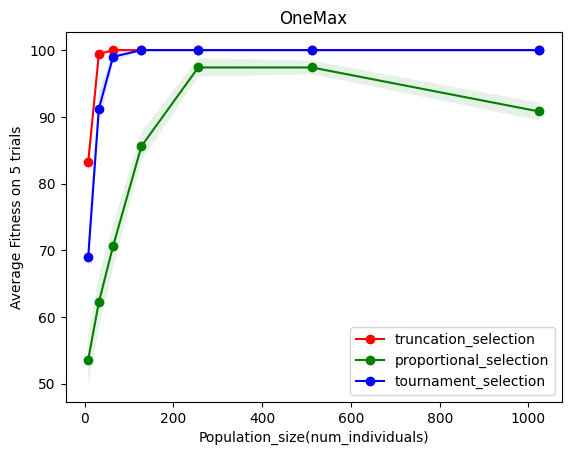

In [86]:
plt.figure()
name = ['truncation_selection', 'proportional_selection', 'tournament_selection']
color = ['r', 'g', 'b']
for i in range(3):
    plt.plot(num_individuals,
             top_average_fitness_onemax[name[i]],
             marker='o',
             color= color[i],
             label= name[i]
            )
    plt.fill_between(num_individuals, 
                     top_average_fitness_onemax[name[i]]+top_std_fitness_onemax[name[i]], 
                     top_average_fitness_onemax[name[i]]-top_std_fitness_onemax[name[i]], 
                     facecolor=color[i], 
                     alpha=0.1)

plt.title("OneMax")
plt.xlabel("Population_size(num_individuals)")
plt.ylabel("Average Fitness on 5 trials")
plt.legend()


**Kết luận vậy**
* Population size thích hợp cho Truncation (onemax): 64
* Population size thích hợp cho Proportional (onemax): 256
* Population size thích hợp cho Tournament (onemax): 128

## Đánh gía thuật toán

In [87]:
n_trials = 10
num_parameters = 100
max_evaluations = 100000
num_individuals = {
    0 : 64,    # 'truncation_selection'
    1 : 256,   # 'proportional_selection'
    2 : 128   # 'tournament_selection'
}
selection = {
    0 : truncation_selection,
    1 : proportional_selection,
    2 : tournament_selection
}
fits_onemax = {
    0 : [],
    1 : [],
    2 : []
}

evals_onemax = {
    0 : [],
    1 : [],
    2 : []
}

for x in range(3):
    for i in range(n_trials):
        np.random.seed(21522490 + i)
        
        pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
            objective = onemax,
            
            selection = selection[x],
            num_individuals = num_individuals[x], 
            
            num_parameters = num_parameters, 
            max_evaluations = max_evaluations,
#             early_stop = True
        )
        
        best_fitness = np.array(best_fitness)
        if i == 0:
            evals_onemax[x] = best_fitness[:,0]
            
        fits_onemax[x].append(best_fitness[:,1])

In [88]:
mean_fits_onemax = {
    0 : np.average(fits_onemax[0], axis = 0),
    1 : np.average(fits_onemax[1], axis = 0),
    2 : np.average(fits_onemax[2], axis = 0)
}
std_fits_onemax = {
    0 : np.std(fits_onemax[0], axis = 0),
    1 : np.std(fits_onemax[1], axis = 0),
    2 : np.std(fits_onemax[2], axis = 0)
}

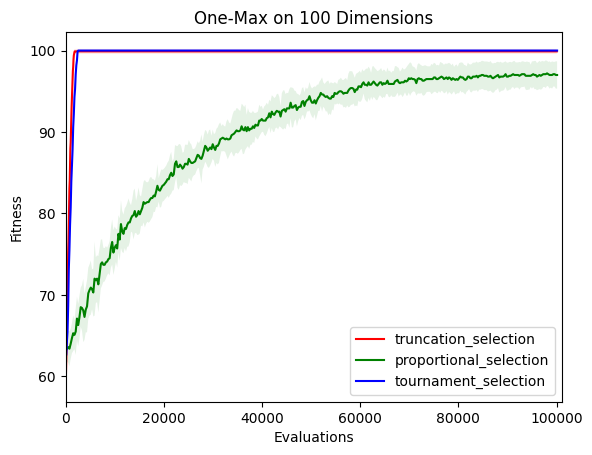

In [89]:
plt.figure()
name = ['truncation_selection', 'proportional_selection', 'tournament_selection']
color = ['r','g','b']
for i in range(3):
    plt.plot(evals_onemax[i],
             mean_fits_onemax[i],
             color= color[i],
             label=name[i]
            )
    plt.fill_between(evals_onemax[i], 
                     mean_fits_onemax[i]+std_fits_onemax[i], 
                     mean_fits_onemax[i]-std_fits_onemax[i],
                     facecolor=color[i], 
                     alpha=0.1)

plt.title(f"One-Max on {num_parameters} Dimensions")
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+1024)
plt.legend()

## LeadingOne

### Tuning Population size

In [90]:
np.random.seed(42)
num_parameters = 10
num_individuals = [8,32,64,128,256,512,1024]
max_evaluations = 100000
n_trials = 5

selection = {
    0 : truncation_selection,
    1 : proportional_selection,
    2 : tournament_selection
}

top_best_fitness_leadingone = {
    0 : [],    # 'truncation_selection'
    1 : [],   # 'proportional_selection'
    2 : []   # 'tournament_selection'
}

for x in range(3):
    for _ in range(n_trials):
        fitness = []
        for num_ind in num_individuals:
            pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
                objective = leadingone, 
                selection = selection[x],
                num_individuals = num_ind, 
                num_parameters = num_parameters, 
                max_evaluations = max_evaluations,
                early_stop = True
            )
            fitness.append(best_fitness[-1][1])

        top_best_fitness_leadingone[x].append(fitness)

In [91]:
top_average_fitness_leadingone = {
    0 : np.average(top_best_fitness_leadingone[0], axis = 0),
    1 : np.average(top_best_fitness_leadingone[1], axis = 0),
    2 : np.average(top_best_fitness_leadingone[2], axis = 0)
}
top_std_fitness_leadingone = {
    0 : np.std(top_best_fitness_leadingone[0], axis = 0),
    1 : np.std(top_best_fitness_leadingone[1], axis = 0),
    2 : np.std(top_best_fitness_leadingone[2], axis = 0)
}

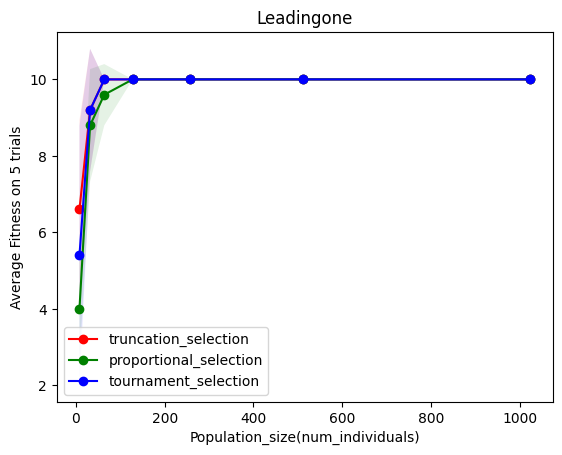

In [104]:
name = ['truncation_selection', 'proportional_selection', 'tournament_selection']
color = ['r', 'g', 'b']

plt.figure()

for i in range(len(selection)):
#     if i == 2 or i == 0:
#         continue
    plt.plot(num_individuals,
             top_average_fitness_leadingone[i],
             marker='o',
             color= color[i],
             label= name[i]
            )
    plt.fill_between(num_individuals, 
                     top_average_fitness_leadingone[i]+top_std_fitness_leadingone[i], 
                     top_average_fitness_leadingone[i]-top_std_fitness_leadingone[i], 
                     facecolor=color[i], 
                     alpha=0.1)

plt.title("Leadingone")
plt.xlabel("Population_size(num_individuals)")
plt.ylabel("Average Fitness on 5 trials")
plt.legend()


**Kết luận vậy**
* Population size thích hợp cho Truncation (leadingone): 64
* Population size thích hợp cho Proportional (leadingone): 128
* Population size thích hợp cho Tournament (leadingone): 64

### Đánh giá thuật toán

In [105]:
n_trials = 10
num_parameters = 10
max_evaluations = 100000
num_individuals = {
    0 : 64,    # 'truncation_selection'
    1 : 128,   # 'proportional_selection'
    2 : 64   # 'tournament_selection'
}
selection = {
    0 : truncation_selection,
    1 : proportional_selection,
    2 : tournament_selection
}
fits_leadingone = {
    0 : [],
    1 : [],
    2 : []
}

evals_leadingone = {
    0 : [],
    1 : [],
    2 : []
}

for x in range(3):
    for i in range(n_trials):
        np.random.seed(21522490 + i)
        
        pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
            objective = leadingone,
            
            selection = selection[x],
            num_individuals = num_individuals[x], 
            
            num_parameters = num_parameters, 
            max_evaluations = max_evaluations,
#             early_stop = True
        )
        
        best_fitness = np.array(best_fitness)
        if i == 0:
            evals_leadingone[x] = best_fitness[:,0]
            
        fits_leadingone[x].append(best_fitness[:,1])

In [106]:
mean_fits_leadingone = {
    0 : np.average(fits_leadingone[0], axis = 0),
    1 : np.average(fits_leadingone[1], axis = 0),
    2 : np.average(fits_leadingone[2], axis = 0)
}
std_fits_leadingone = {
    0 : np.std(fits_leadingone[0], axis = 0),
    1 : np.std(fits_leadingone[1], axis = 0),
    2 : np.std(fits_leadingone[2], axis = 0)
}

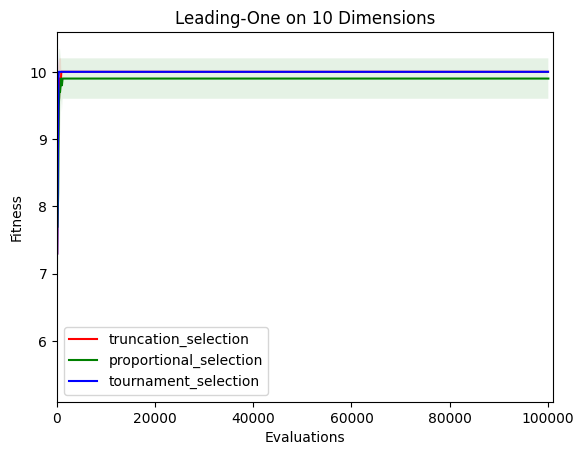

In [107]:
plt.figure()
name = ['truncation_selection', 'proportional_selection', 'tournament_selection']
color = ['r','g','b']
for i in range(3):
    plt.plot(evals_leadingone[i],
             mean_fits_leadingone[i],
             color= color[i],
             label=name[i]
            )
    plt.fill_between(evals_leadingone[i], 
                     mean_fits_leadingone[i]+std_fits_leadingone[i], 
                     mean_fits_leadingone[i]-std_fits_leadingone[i],
                     facecolor=color[i], 
                     alpha=0.1)

plt.title(f"Leading-One on {num_parameters} Dimensions")
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+1024)
plt.legend()

## Concatenate Trap-5

### Tuning population size

In [108]:
np.random.seed(42)
num_parameters = 20
num_individuals = [8,32,64,128,256,512,1024]
max_evaluations = 100000
n_trials = 5

selection = {
    0 : truncation_selection,
    1 : proportional_selection,
    2 : tournament_selection
}

top_best_fitness_concatenate_trap_5 = {
    0 : [],    # 'truncation_selection'
    1 : [],   # 'proportional_selection'
    2 : []   # 'tournament_selection'
}

for x in range(3):
    for _ in range(n_trials):
        fitness = []
        for num_ind in num_individuals:
            pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
                objective = concatenate_trap_5, 
                selection = selection[x],
                num_individuals = num_ind, 
                num_parameters = num_parameters, 
                max_evaluations = max_evaluations,
                early_stop = True
            )
            fitness.append(best_fitness[-1][1])

        top_best_fitness_concatenate_trap_5[x].append(fitness)

In [109]:
top_average_fitness_concatenate_trap_5 = {
    0 : np.average(top_best_fitness_concatenate_trap_5[0], axis = 0),
    1 : np.average(top_best_fitness_concatenate_trap_5[1], axis = 0),
    2 : np.average(top_best_fitness_concatenate_trap_5[2], axis = 0)
}
top_std_fitness_concatenate_trap_5 = {
    0 : np.std(top_best_fitness_concatenate_trap_5[0], axis = 0),
    1 : np.std(top_best_fitness_concatenate_trap_5[1], axis = 0),
    2 : np.std(top_best_fitness_concatenate_trap_5[2], axis = 0)
}

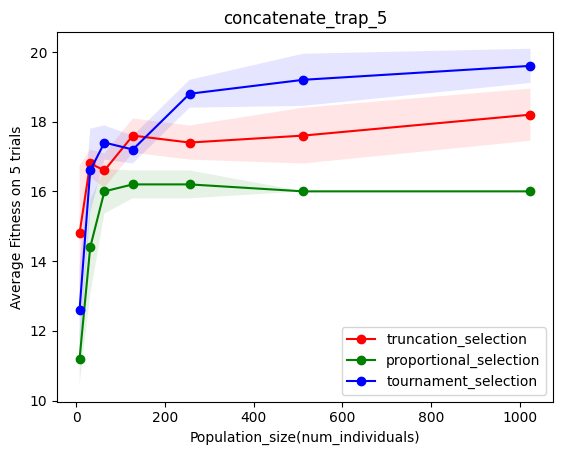

In [110]:
name = ['truncation_selection', 'proportional_selection', 'tournament_selection']
color = ['r', 'g', 'b']

plt.figure()

for i in range(len(selection)):
#     if i == 0:
#         continue
    plt.plot(num_individuals,
             top_average_fitness_concatenate_trap_5[i],
             marker='o',
             color= color[i],
             label= name[i]
            )
    plt.fill_between(num_individuals, 
                     top_average_fitness_concatenate_trap_5[i]+top_std_fitness_concatenate_trap_5[i], 
                     top_average_fitness_concatenate_trap_5[i]-top_std_fitness_concatenate_trap_5[i], 
                     facecolor=color[i], 
                     alpha=0.1)

plt.title("concatenate_trap_5")
plt.xlabel("Population_size(num_individuals)")
plt.ylabel("Average Fitness on 5 trials")
plt.legend()


**Kết luận vậy**
* Population size thích hợp cho Truncation (concatenate_trap_5): 1024
* Population size thích hợp cho Proportional (concatenate_trap_5): 512
* Population size thích hợp cho Tournament (concatenate_trap_5): 1024

### Đánh giá thuật toán

In [111]:
n_trials = 10
num_parameters = 20
max_evaluations = 100000
num_individuals = {
    0 : 1024,    # 'truncation_selection'
    1 : 512,   # 'proportional_selection'
    2 : 1024   # 'tournament_selection'
}
selection = {
    0 : truncation_selection,
    1 : proportional_selection,
    2 : tournament_selection
}
fits_concatenate_trap_5 = {
    0 : [],
    1 : [],
    2 : []
}

evals_concatenate_trap_5 = {
    0 : [],
    1 : [],
    2 : []
}

for x in range(3):
    for i in range(n_trials):
        np.random.seed(21522490 + i)
        
        pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
            objective = concatenate_trap_5,
            
            selection = selection[x],
            num_individuals = num_individuals[x], 
            
            num_parameters = num_parameters, 
            max_evaluations = max_evaluations,
#             early_stop = True
        )
        
        best_fitness = np.array(best_fitness)
        if i == 0:
            evals_concatenate_trap_5[x] = best_fitness[:,0]
            
        fits_concatenate_trap_5[x].append(best_fitness[:,1])

In [112]:
mean_fits_concatenate_trap_5 = {
    0 : np.average(fits_concatenate_trap_5[0], axis = 0),
    1 : np.average(fits_concatenate_trap_5[1], axis = 0),
    2 : np.average(fits_concatenate_trap_5[2], axis = 0)
}
std_fits_concatenate_trap_5 = {
    0 : np.std(fits_concatenate_trap_5[0], axis = 0),
    1 : np.std(fits_concatenate_trap_5[1], axis = 0),
    2 : np.std(fits_concatenate_trap_5[2], axis = 0)
}

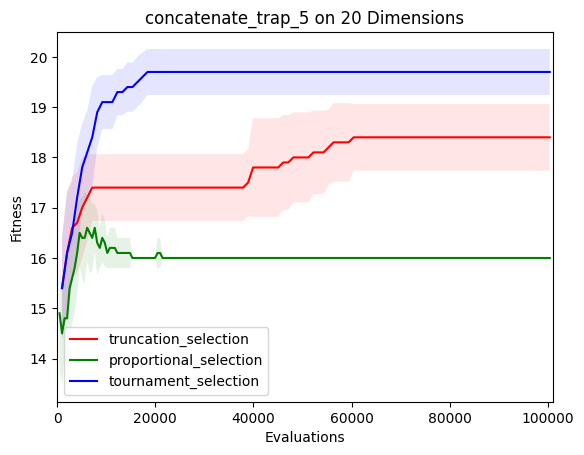

In [113]:
plt.figure()
name = ['truncation_selection', 'proportional_selection', 'tournament_selection']
color = ['r','g','b']
for i in range(3):
    plt.plot(evals_concatenate_trap_5[i],
             mean_fits_concatenate_trap_5[i],
             color= color[i],
             label=name[i]
            )
    plt.fill_between(evals_concatenate_trap_5[i], 
                     mean_fits_concatenate_trap_5[i]+std_fits_concatenate_trap_5[i], 
                     mean_fits_concatenate_trap_5[i]-std_fits_concatenate_trap_5[i],
                     facecolor=color[i], 
                     alpha=0.1)

plt.title(f"concatenate_trap_5 on {num_parameters} Dimensions")
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+1024)
plt.legend()